(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Analyzing hotel ratings on Tripadvisor

In this homework we will focus on practicing two techniques: web scraping and regression. For the first part, we will build upon the sample code from the Lecture and attempt to get some basic information for each hotel. Then, we will fit a regression model on this information and try to analyze it.   

One of the main disadvantages of scraping a website instead of using an API is that, without any notice, the website may change its layout and render our code useless. Something like that happened in our case. Tripadvisor changed the layout of the buttons that we use to navigate between the different pages of the results. This was the main reason people were having problem with executing the code.

**Task 1 (20 pts)**

The first task of the homework is to fix the scraping code. We basically need to replace the part where we are checking if there is another page and getting its link with new code that reflects the new navigation layout. 

** Task 2 (30 pts)**

Then, for each hotel that our search returns, we will "click" (with the code of course) on it and scrape the information below.

![Information to be scraped](hotel_info.png)

Of course, feel free to collect even more data if you want. 

** Task 3 (20 pts) **

Now, we will use regression to analyze this information. First, we will fit a linear regression model that predicts the average rating. For example, for the hotel above, the average rating is

$$ \text{AVG_SCORE} = \frac{1*31 + 2*33 + 3*98 + 4*504 + 5*1861}{2527}$$

Use the model to analyze the important factors that decide the $\text{AVG_SCORE}$.

** Task 4 (30 pts) **

Finally, we will use logistic regression to decide if a hotel is _excellent_ or not. We classify a hotel as _excellent_ if more than **60%** of its ratings are 5 stars. This is a binary attribute on which we can fit a logistic regression model. As before, use the model to analyze the data.

-------

In order to use code from a Python script file, we need to put that file in the same folder as the notebook and import it as a library. Then, we will be able to access it's functions. For example, in the case of the lecture code, we could do the following:

``` python
import scrape_solution as scrape

scrape.get_city_page()
```

Of course, you might need to modify and restructure the code so that it returns what you need.

----

First Step (please see the code) and Second Step

In [2]:
import scrape_solution as scrape
# city_url = scrape.get_city_page("Boston", "MA", "data/")
# for i in range (1,4):
#     html = scrape.get_hotellist_page("http://www.tripadvisor.com/Hotels-g60745-Boston_Massachusetts-Hotels.html", i, "Boston")

# scrape.parse_hotellist_page(html)
scrape.scrape_hotels("Boston", "MA")

[2015-04-06 22:25:46,857] #################################### Option 2 ######################################
INFO:scrape_solution:#################################### Option 2 ######################################
[2015-04-06 22:25:46,971] #################################### Option 3 ######################################
INFO:scrape_solution:#################################### Option 3 ######################################
[2015-04-06 22:25:47,083] Hotel name: Hyatt Boston Harbor
INFO:scrape_solution:Hotel name: Hyatt Boston Harbor
[2015-04-06 22:25:47,084] Stars: 4
INFO:scrape_solution:Stars: 4
[2015-04-06 22:25:47,087] Number of reviews: 1,171 reviews 
INFO:scrape_solution:Number of reviews: 1,171 reviews 
[2015-04-06 22:25:48,469] Traveler Rating ------>
INFO:scrape_solution:Traveler Rating ------>
[2015-04-06 22:25:48,470] Excellent: 480
INFO:scrape_solution:Excellent: 480
[2015-04-06 22:25:48,472] Very good: 424
INFO:scrape_solution:Very good: 424
[2015-04-06 22:25:48,473] 

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [4]:
# Loading the libraries 

import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
from scipy.spatial.distance import pdist, squareform
from pkg_resources import resource_stream
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.cluster as cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns
%matplotlib inline

/Users/Lucas/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/Lucas/anaconda/lib/python2.7/argparse.pyc, but /Users/Lucas/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [5]:
# reload the scrape aftering loading the other libraries 
reload(scrape)

<module 'scrape_solution' from 'scrape_solution.pyc'>

In [6]:
# Created a new file with the first row as labels and reading the csv file as dataframe
dataframe = pd.read_csv('hotel_stats.csv')
dataframe.info()
dataframe.columnsx

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 17 columns):
STAR             77 non-null float64
TOTAL_REV        77 non-null int64
EXCELLENT        77 non-null int64
VERY_GOOD        77 non-null int64
AVERAGE          77 non-null int64
POOR             77 non-null int64
TERRIBLE         77 non-null int64
FAMILIES         77 non-null int64
COUPLES          77 non-null int64
SOLO             77 non-null int64
BUSINESS         77 non-null int64
LOCATION         77 non-null float64
SLEEP_QUALITY    77 non-null float64
ROOM             77 non-null float64
SERVICE          77 non-null float64
VALUE            77 non-null float64
CLEANLINESS      77 non-null float64
dtypes: float64(7), int64(10)
memory usage: 10.8 KB


Index([u'STAR', u'TOTAL_REV', u'EXCELLENT', u'VERY_GOOD', u'AVERAGE', u'POOR', u'TERRIBLE', u'FAMILIES', u'COUPLES', u'SOLO', u'BUSINESS', u'LOCATION', u'SLEEP_QUALITY', u'ROOM', u'SERVICE', u'VALUE', u'CLEANLINESS'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 18 columns):
STAR             77 non-null float64
TOTAL_REV        77 non-null int64
EXCELLENT        77 non-null int64
VERY_GOOD        77 non-null int64
AVERAGE          77 non-null int64
POOR             77 non-null int64
TERRIBLE         77 non-null int64
FAMILIES         77 non-null int64
COUPLES          77 non-null int64
SOLO             77 non-null int64
BUSINESS         77 non-null int64
LOCATION         77 non-null float64
SLEEP_QUALITY    77 non-null float64
ROOM             77 non-null float64
SERVICE          77 non-null float64
VALUE            77 non-null float64
CLEANLINESS      77 non-null float64
Avg_Rating       77 non-null float64
dtypes: float64(8), int64(10)
memory usage: 11.4 KB


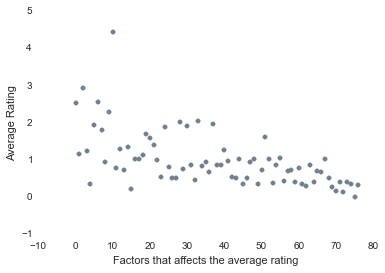

In [7]:
# Create a new column of data called Average Rating that will be used for linear Regression Analysis

dataframe['Avg_Rating'] = (dataframe['EXCELLENT'] + dataframe['VERY_GOOD']+dataframe['AVERAGE']+dataframe['POOR']+dataframe['TERRIBLE'])/1000
dataframe.info()
# Plot the factors that affects the average rating and 5 is the top, 0 is the worst
factors = pd.DataFrame(dataframe['Avg_Rating'])
plt.scatter(factors.index, dataframe['Avg_Rating'],color = 'slategray')
plt.xlabel('Factors that affects the average rating')
plt.ylabel('Average Rating');

In [8]:
# Dataframe outlook 
print dataframe

    STAR  TOTAL_REV  EXCELLENT  VERY_GOOD  AVERAGE  POOR  TERRIBLE  FAMILIES  \
0    4.5       2540       1872        506       98    33        31       461   
1    4.0       1167        479        424      164    67        33       239   
2    4.5       2937       2365        439       81    39        13       910   
3    4.5       1248        990        189       43    15        11       284   
4    4.5        354        244         81       21     7         1       102   
5    4.5       1943       1091        615      181    39        17       445   
6    4.5       2561       1880        509      107    45        20       630   
7    4.5       1824       1175        496      104    30        19       328   
8    4.5        961        625        274       43     8        11       229   
9    4.0       2303       1069        832      276    92        34       545   
10   4.0       4446       2025       1485      559   243       134       918   
11   4.5        795        595        13

Third Step, Linear Rgression

In [12]:
y = dataframe['Avg_Rating']
X = dataframe.drop(['Avg_Rating'],axis=1)
#print y
print X

    STAR  TOTAL_REV  EXCELLENT  VERY_GOOD  AVERAGE  POOR  TERRIBLE  FAMILIES  \
0    4.5       2540       1872        506       98    33        31       461   
1    4.0       1167        479        424      164    67        33       239   
2    4.5       2937       2365        439       81    39        13       910   
3    4.5       1248        990        189       43    15        11       284   
4    4.5        354        244         81       21     7         1       102   
5    4.5       1943       1091        615      181    39        17       445   
6    4.5       2561       1880        509      107    45        20       630   
7    4.5       1824       1175        496      104    30        19       328   
8    4.5        961        625        274       43     8        11       229   
9    4.0       2303       1069        832      276    92        34       545   
10   4.0       4446       2025       1485      559   243       134       918   
11   4.5        795        595        13

In [7]:
model = sm.OLS(y, X)
print model

In [8]:
results = model.fit()
print results.summary()
print "Confidence Intervals:", results.conf_int()
print "Parameters:", results.params

                            OLS Regression Results                            
Dep. Variable:             Avg_Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.356e+28
Date:                Mon, 06 Apr 2015   Prob (F-statistic):               0.00
Time:                        21:28:20   Log-Likelihood:                 2389.0
No. Observations:                  77   AIC:                            -4744.
Df Residuals:                      60   BIC:                            -4704.
Df Model:                          17                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
STAR          -5.274e-16   7.66e-15     -0.069      0.945     -1.59e-14  1.48e-14
TOTAL_REV       2.22e-16   2.93e-15      0.

Split the data into training and testing

(46, 17) (46,)
(31, 17) (31,)


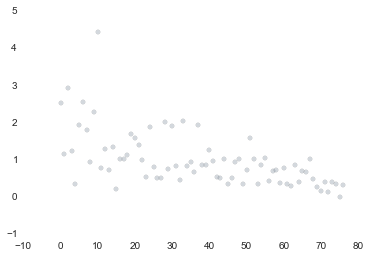

In [9]:
plt.scatter(range(len(y)), y, c="slategray", alpha=0.3, linewidths=0.2)
X, y = utils.shuffle(dataframe.drop('Avg_Rating', axis=1), dataframe['Avg_Rating'], random_state=1)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape), y_train.shape
print(X_test.shape), y_test.shape

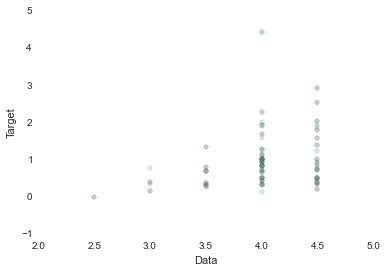

In [10]:
# Visualizing the results of linear regression
subX_train = X_train[:,0]
subX_test = X_test[:,0]
plt.scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
plt.scatter(subX_test, y_test, c="seagreen", alpha=0.2, linewidths=0.3)
plt.xlabel('Data')
plt.ylabel('Target');

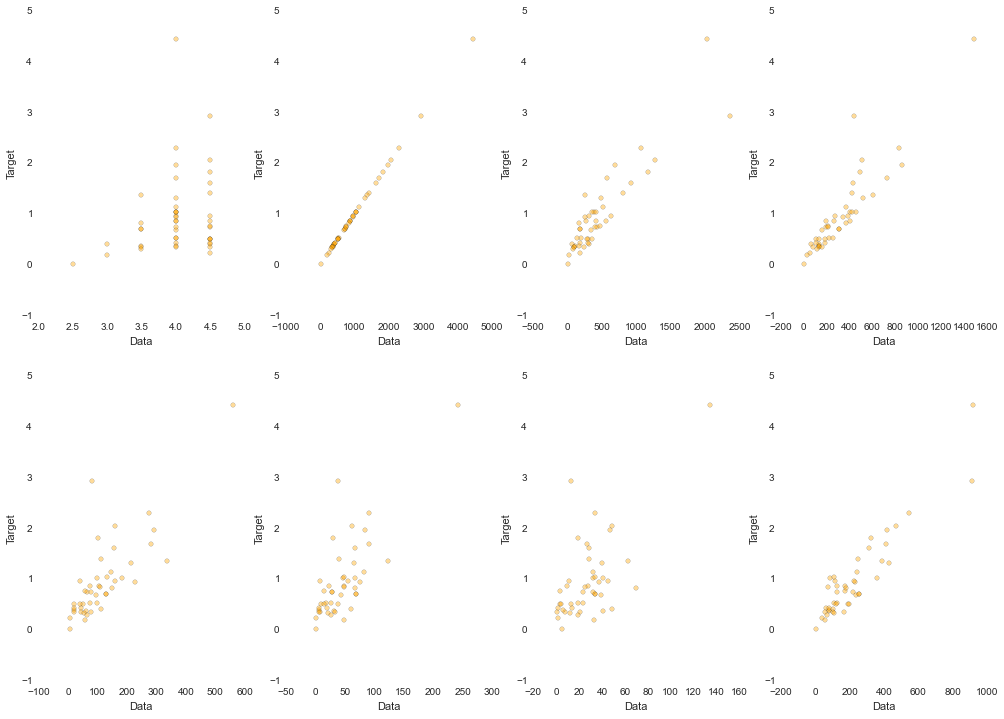

In [11]:
fig, axes = plt.subplots(2,4,figsize=(17,12))

for i in range(8):
    plt_i = i // 4
    plt_j = i % 4
    subX_train = X_train[:,i]
    # plt.subplot(2, 4, 1 + i)
    axes[plt_i][plt_j].scatter(subX_train, y_train, c="orange", alpha=0.4, linewidths=0.3)
    #plt.scatter(subX_test, y_test)
    axes[plt_i][plt_j].set_xlabel('Data')
    axes[plt_i][plt_j].set_ylabel('Target'); 

In [13]:
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train);


In [14]:

# The mean square error
print("Training error: ", metrics.mean_squared_error(regr.predict(X_train),y_train))
print("Test     error: ", metrics.mean_squared_error(regr.predict(X_test),y_test))

# Training and Testing Score
train_score = regr.score(X_train,y_train)
test_score = regr.score(X_test,y_test)
print("Training score: ", train_score)
print("Test     score: ", test_score)

('Training error: ', 1.2307488099112818e-29)
('Test     error: ', 1.0125371664266974e-29)
('Training score: ', 1.0)
('Test     score: ', 1.0)


In [17]:
coefficients = regr.coef_

In [20]:
print pd.DataFrame(zip(dataframe['Avg_Rating'], np.transpose(coefficients)))

        0             1
0   2.540  1.942946e-15
1   1.167  1.495796e-16
2   2.937  1.000000e-03
3   1.248  1.000000e-03
4   0.354  1.000000e-03
5   1.943  1.000000e-03
6   2.561  1.000000e-03
7   1.824  3.723421e-18
8   0.961  6.949768e-18
9   2.303  6.460361e-19
10  4.446  7.776519e-18
11  0.795  1.257726e-15
12  1.317  8.967191e-16
13  0.742  4.856047e-16
14  1.369  1.154095e-15
15  0.242  1.297575e-15
16  1.042  4.271359e-16


In [22]:
regr = linear_model.LinearRegression()
scores = cross_validation.cross_val_score(regr, X, y, cv=5)
print scores
print("Regression score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 1.  1.  1.  1.  1.]
Regression score: 1.00 (+/- 0.00)


Task 4 Logistic Regression Model

In [30]:
#Creating a new Column
# dataframe['New_EXCELLENT'] = (dataframe['EXCELLENT'] / dataframe['TOTAL_REV']) > 0.6


new_df = dataframe.copy().drop(['Avg_Rating'], axis=1)
new_df['New_Excellent'] = (dataframe['EXCELLENT'] / dataframe['TOTAL_REV']) > 0.6
new_df.info()
print new_df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 18 columns):
STAR             77 non-null float64
TOTAL_REV        77 non-null int64
EXCELLENT        77 non-null int64
VERY_GOOD        77 non-null int64
AVERAGE          77 non-null int64
POOR             77 non-null int64
TERRIBLE         77 non-null int64
FAMILIES         77 non-null int64
COUPLES          77 non-null int64
SOLO             77 non-null int64
BUSINESS         77 non-null int64
LOCATION         77 non-null float64
SLEEP_QUALITY    77 non-null float64
ROOM             77 non-null float64
SERVICE          77 non-null float64
VALUE            77 non-null float64
CLEANLINESS      77 non-null float64
New_Excellent    77 non-null bool
dtypes: bool(1), float64(7), int64(10)
memory usage: 10.9 KB
    STAR  TOTAL_REV  EXCELLENT  VERY_GOOD  AVERAGE  POOR  TERRIBLE  FAMILIES  \
0    4.5       2540       1872        506       98    33        31       461   
1    4.0       1167        479   

In [31]:
print new_df.groupby('New_Excellent').size()
new_df.groupby('New_Excellent').mean()

New_Excellent
False            60
True             17
dtype: int64


,STAR,TOTAL_REV,EXCELLENT,VERY_GOOD,AVERAGE,POOR,TERRIBLE,FAMILIES,COUPLES,SOLO,BUSINESS,LOCATION,SLEEP_QUALITY,ROOM,SERVICE,VALUE,CLEANLINESS
New_Excellent,,,,,,,,,,,,,,,,,
False,3.9,963.433333,383.450000,354.416667,139.733333,54.083333,31.916667,214.150000,286.016667,64.450000,231.816667,4.433333,3.983333,3.941667,4.100000,3.816667,4.283333
True,4.5,1181.529412,845.352941,246.764706,55.764706,21.117647,12.588235,280.647059,387.882353,62.294118,271.647059,4.823529,4.558824,4.529412,4.617647,4.264706,4.794118


In [33]:
y = new_df['New_Excellent']
X = new_df.drop(['New_Excellent'],axis=1)
print y
print X

0      True
1     False
2      True
3      True
4      True
5     False
6      True
7      True
8      True
9     False
10    False
11     True
12    False
13    False
14    False
...
62    False
63    False
64     True
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
Name: New_Excellent, Length: 77, dtype: bool
    STAR  TOTAL_REV  EXCELLENT  VERY_GOOD  AVERAGE  POOR  TERRIBLE  FAMILIES  \
0    4.5       2540       1872        506       98    33        31       461   
1    4.0       1167        479        424      164    67        33       239   
2    4.5       2937       2365        439       81    39        13       910   
3    4.5       1248        990        189       43    15        11       284   
4    4.5        354        244         81       21     7         1       102   
5    4.5       1943       1091        615      181    39        17       445   
6    4.5       2561       1880 

In [37]:
print new_df.groupby('SERVICE').size()
new_df.groupby('SERVICE').mean()

SERVICE
2.5         1
3.0         1
3.5         5
4.0        31
4.5        35
5.0         4
dtype: int64


,STAR,TOTAL_REV,EXCELLENT,VERY_GOOD,AVERAGE,POOR,TERRIBLE,FAMILIES,COUPLES,SOLO,BUSINESS,LOCATION,SLEEP_QUALITY,ROOM,VALUE,CLEANLINESS,New_Excellent
SERVICE,,,,,,,,,,,,,,,,,
2.5,2.500000,18.000000,2.000000,2.000000,8.000000,1.000000,5.000000,4.000000,3.000000,2.000000,3.000000,3.000000,2.500000,2.500000,3.000000,3.000000,0.000000
3.0,3.000000,189.000000,19.000000,32.000000,57.000000,48.000000,33.000000,57.000000,31.000000,12.000000,41.000000,3.500000,3.000000,3.000000,3.000000,3.000000,0.000000
3.5,3.200000,449.200000,63.000000,142.800000,127.000000,64.400000,52.400000,81.800000,130.800000,47.000000,85.600000,4.000000,3.300000,3.100000,3.500000,3.600000,0.000000
4.0,3.887097,954.516129,315.967742,391.677419,156.967742,57.903226,32.161290,216.774194,275.258065,70.387097,228.516129,4.451613,3.935484,3.951613,3.838710,4.354839,0.000000
4.5,4.300000,1087.742857,605.771429,322.657143,99.657143,37.628571,22.142857,237.542857,342.285714,60.114286,269.514286,4.671429,4.385714,4.328571,4.042857,4.557143,0.371429
5.0,4.500000,1944.500000,1511.250000,319.250000,69.500000,30.250000,14.250000,529.000000,638.500000,97.750000,384.500000,5.000000,4.750000,4.625000,4.375000,5.000000,1.000000


In [40]:
print new_df.groupby('SLEEP_QUALITY').size()
new_df.groupby('SLEEP_QUALITY').mean()

SLEEP_QUALITY
2.5               1
3.0               3
3.5              11
4.0              28
4.5              31
5.0               3
dtype: int64


,STAR,TOTAL_REV,EXCELLENT,VERY_GOOD,AVERAGE,POOR,TERRIBLE,FAMILIES,COUPLES,SOLO,BUSINESS,LOCATION,ROOM,SERVICE,VALUE,CLEANLINESS,New_Excellent
SLEEP_QUALITY,,,,,,,,,,,,,,,,,
2.5,2.500000,18.000000,2.000000,2.000000,8.000000,1.000000,5.000000,4.000000,3.000000,2.000000,3.000000,3.000000,2.500000,2.500000,3.000000,3.000000,0.000000
3.0,3.166667,426.000000,46.666667,119.666667,135.333333,78.000000,47.000000,80.000000,118.000000,33.666667,101.333333,3.666667,3.166667,3.333333,3.166667,3.500000,0.000000
3.5,3.636364,626.909091,172.909091,247.090909,122.727273,49.545455,34.636364,153.727273,162.636364,44.909091,152.272727,4.136364,3.772727,3.863636,3.772727,4.000000,0.000000
4.0,3.946429,1102.928571,415.607143,426.071429,164.321429,61.678571,35.428571,249.607143,321.035714,79.285714,264.750000,4.553571,3.982143,4.160714,3.875000,4.410714,0.035714
4.5,4.338710,1111.096774,651.967742,316.483871,90.935484,33.193548,18.645161,239.225806,367.709677,60.838710,261.258065,4.709677,4.338710,4.467742,4.080645,4.596774,0.419355
5.0,4.500000,1458.000000,1162.000000,213.333333,49.333333,22.666667,10.666667,426.666667,407.000000,74.333333,344.333333,5.000000,4.666667,4.833333,4.166667,5.000000,1.000000


In [41]:
print new_df.groupby('ROOM').size()
new_df.groupby('ROOM').mean()

ROOM
2.5      2
3.0      3
3.5      7
4.0     36
4.5     28
5.0      1
dtype: int64


,STAR,TOTAL_REV,EXCELLENT,VERY_GOOD,AVERAGE,POOR,TERRIBLE,FAMILIES,COUPLES,SOLO,BUSINESS,LOCATION,SLEEP_QUALITY,SERVICE,VALUE,CLEANLINESS,New_Excellent
ROOM,,,,,,,,,,,,,,,,,
2.5,2.750000,193.000000,15.500000,60.500000,60.000000,22.500000,34.500000,23.500000,55.000000,39.500000,29.500000,3.750000,3.000000,3.000000,3.250000,3.250000,0.000000
3.0,3.000000,467.333333,49.666667,132.000000,145.000000,86.666667,54.333333,91.333333,125.000000,38.666667,101.666667,3.666667,3.166667,3.333333,3.166667,3.333333,0.000000
3.5,3.571429,641.000000,152.142857,262.285714,132.857143,53.000000,40.857143,152.714286,195.428571,53.142857,98.571429,4.285714,3.714286,3.857143,3.857143,4.000000,0.000000
4.0,3.986111,1085.805556,430.055556,408.805556,156.222222,58.777778,32.166667,239.527778,327.250000,73.527778,264.916667,4.555556,4.069444,4.166667,3.833333,4.402778,0.000000
4.5,4.392857,1056.821429,653.071429,283.964286,76.500000,27.607143,15.714286,239.178571,331.071429,55.928571,262.535714,4.660714,4.410714,4.517857,4.142857,4.660714,0.571429
5.0,4.500000,2937.000000,2365.000000,439.000000,81.000000,39.000000,13.000000,910.000000,851.000000,146.000000,585.000000,5.000000,5.000000,5.000000,4.500000,5.000000,1.000000


In [42]:
print new_df.groupby('CLEANLINESS').size()
new_df.groupby('CLEANLINESS').mean()

CLEANLINESS
3.0             2
3.5             4
4.0            12
4.5            49
5.0            10
dtype: int64


,STAR,TOTAL_REV,EXCELLENT,VERY_GOOD,AVERAGE,POOR,TERRIBLE,FAMILIES,COUPLES,SOLO,BUSINESS,LOCATION,SLEEP_QUALITY,ROOM,SERVICE,VALUE,New_Excellent
CLEANLINESS,,,,,,,,,,,,,,,,,
3.0,2.750000,103.500000,10.500000,17.000000,32.500000,24.500000,19.000000,30.500000,17.000000,7.000000,22.000000,3.250000,2.750000,2.750000,2.750000,3.000000,0.000000
3.5,3.125000,490.000000,67.000000,155.000000,137.500000,72.000000,58.750000,85.000000,140.750000,54.500000,96.750000,4.125000,3.375000,3.000000,3.500000,3.500000,0.000000
4.0,3.666667,654.833333,181.666667,251.666667,132.333333,53.916667,35.333333,193.083333,162.250000,44.833333,124.666667,4.166667,3.708333,3.791667,4.041667,3.833333,0.000000
4.5,4.153061,1127.285714,516.714286,398.632653,135.734694,49.387755,27.000000,240.816327,353.591837,71.959184,276.204082,4.632653,4.224490,4.183673,4.275510,3.918367,0.142857
5.0,4.500000,1263.000000,959.000000,225.300000,47.800000,20.000000,10.900000,310.200000,388.500000,63.000000,306.600000,4.800000,4.600000,4.550000,4.700000,4.350000,1.000000


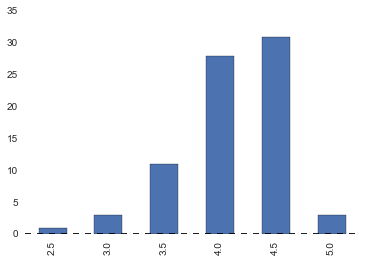

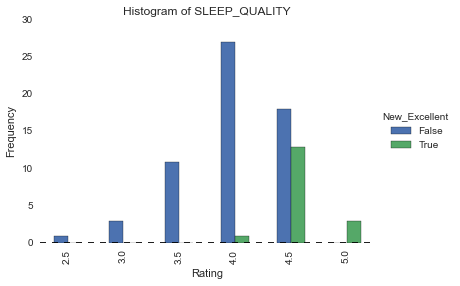

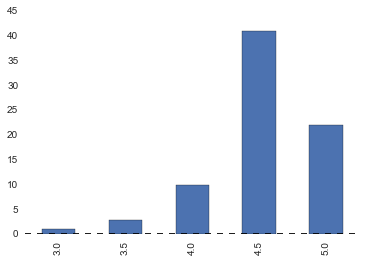

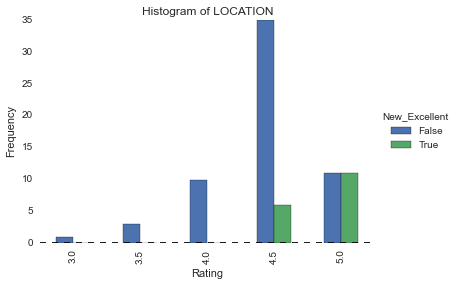

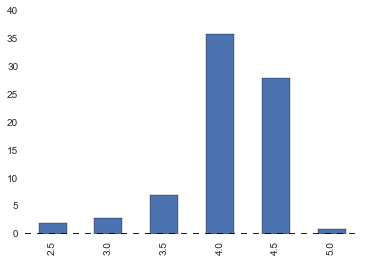

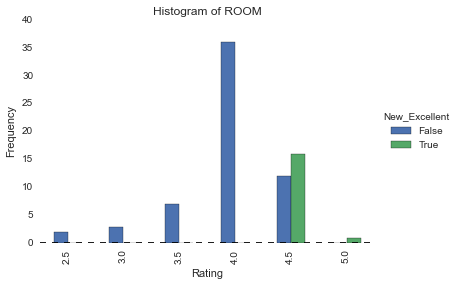

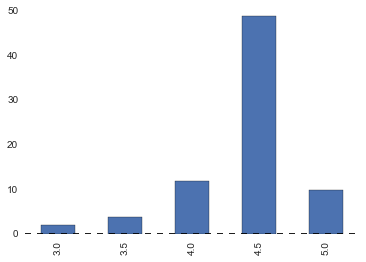

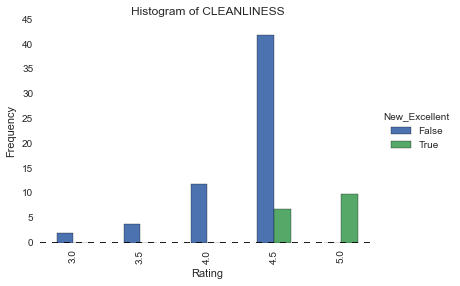

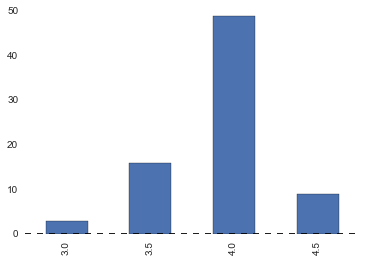

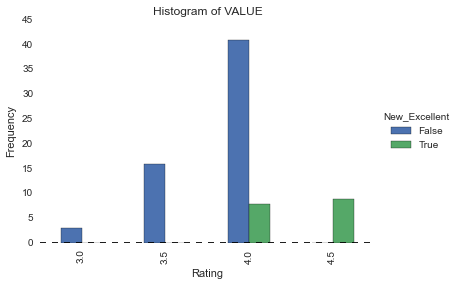

In [54]:
new_df.SLEEP_QUALITY.value_counts().sort_index().plot(kind='bar')
pd.crosstab(new_df.SLEEP_QUALITY ,new_df.New_Excellent.astype(bool)).plot(kind='bar')
plt.title('Histogram of SLEEP_QUALITY')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend(loc='center left', title="New_Excellent", bbox_to_anchor=(1, 0.5))
plt.show()
new_df.LOCATION.value_counts().sort_index().plot(kind='bar')
pd.crosstab(new_df.LOCATION ,new_df.New_Excellent.astype(bool)).plot(kind='bar')
plt.title('Histogram of LOCATION')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend(loc='center left', title="New_Excellent", bbox_to_anchor=(1, 0.5))
plt.show()
new_df.ROOM.value_counts().sort_index().plot(kind='bar')
pd.crosstab(new_df.ROOM ,new_df.New_Excellent.astype(bool)).plot(kind='bar')
plt.title('Histogram of ROOM')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend(loc='center left', title="New_Excellent", bbox_to_anchor=(1, 0.5))
plt.show()
new_df.CLEANLINESS.value_counts().sort_index().plot(kind='bar')
pd.crosstab(new_df.CLEANLINESS ,new_df.New_Excellent.astype(bool)).plot(kind='bar')
plt.title('Histogram of CLEANLINESS')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend(loc='center left', title="New_Excellent", bbox_to_anchor=(1, 0.5))
plt.show()
new_df.VALUE.value_counts().sort_index().plot(kind='bar')
pd.crosstab(new_df.VALUE ,new_df.New_Excellent.astype(bool)).plot(kind='bar')
plt.title('Histogram of VALUE')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend(loc='center left', title="New_Excellent", bbox_to_anchor=(1, 0.5))
plt.show()

Analyzing the data using Logistic Regression:

In [55]:
# Evaluate the model by splitting into train and test sets

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,
                                                                     y,
                                                                     test_size=0.2,
                                                                     random_state=0
                                                                     )
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [56]:
# predict class labels for the test set
y_predicted = logistic_regr.predict(X_test)
print y_predicted

[False False  True False False False False  True False False  True False
  True False False  True]


In [57]:
# prediction probabilities
probs = logistic_regr.predict_proba(X_test)
print probs

[[  1.00000000e+00   9.92907640e-42]
 [  1.00000000e+00   3.30061592e-31]
 [  6.74958129e-07   9.99999325e-01]
 [  1.00000000e+00   6.00348754e-27]
 [  1.00000000e+00   1.30349213e-31]
 [  1.00000000e+00   8.55426380e-18]
 [  9.99741049e-01   2.58951157e-04]
 [  3.80303609e-01   6.19696391e-01]
 [  9.99998735e-01   1.26459456e-06]
 [  1.00000000e+00   3.55314042e-19]
 [  2.18591767e-05   9.99978141e-01]
 [  1.00000000e+00   3.78886499e-63]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   6.70526524e-22]
 [  1.00000000e+00   6.03303375e-25]
 [  5.23803223e-13   1.00000000e+00]]


In [58]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, y_predicted)

1.0


In [59]:
# lokking the confusion matrix 
print metrics.confusion_matrix(y_test, y_predicted)
print metrics.classification_report(y_test, y_predicted)

[[11  0]
 [ 0  5]]
             precision    recall  f1-score   support

      False       1.00      1.00      1.00        11
       True       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        16



Looking at the coefficients

In [60]:

print pd.DataFrame(zip(X.columns, np.transpose(logistic_regr.coef_)))

                0                   1
0            STAR  [-0.0280457357782]
1       TOTAL_REV   [-0.111568416196]
2       EXCELLENT    [0.230508561724]
3       VERY_GOOD  [-0.0113401278561]
4         AVERAGE   [-0.131660054664]
5            POOR  [-0.0651624200999]
6        TERRIBLE   [-0.133848433475]
7        FAMILIES  [-0.0128629165001]
8         COUPLES   [0.0136916212759]
9            SOLO  [-0.0830641169247]
10       BUSINESS  [-0.0362441205097]
11       LOCATION  [-0.0359593651413]
12  SLEEP_QUALITY  [-0.0283973375838]
13           ROOM   [-0.028043629984]
14        SERVICE  [-0.0281042611924]
15          VALUE  [-0.0350782395037]
16    CLEANLINESS  [-0.0349197576553]


5-fold cross validation of the of the model

In [61]:

scores = cross_validation.cross_val_score(linear_model.LogisticRegression(),
                                          X,
                                          y,
                                          scoring='accuracy',
                                          cv=10)
print scores
print scores.mean()

[ 1.     1.     0.875  1.     1.     1.     0.875  1.     1.     1.   ]
0.975


In [62]:
# logistic_regr.predict_proba(np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,
#                               16]))

In [33]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()